# Coin toss model (Beta-Bernoulli)

In [2]:
# Activate local environment, see `Project.toml`
import Pkg; Pkg.activate(".."); Pkg.instantiate();

  Activating project at `~/.julia/dev/RxInfer.jl/examples`


In this example, we are going to perform an exact inference for a coin-toss model that can be represented as:

$$\begin{aligned}
p(\theta) &= \mathrm{Beta}(\theta|a, b),\\
p(y_i|\theta) &= \mathrm{Bernoulli}(y_i|\theta),\\
\end{aligned}$$

where $y_i \in \{0, 1\}$ is a binary observation induced by Bernoulli likelihood while $\theta$ is a Beta prior distribution on the parameter of Bernoulli.
We are interested in inferring the posterior distribution of $\theta$.

We start with importing all needed packages:

In [3]:
using RxInfer, Random

Let's generate some synthetic observations using Bernoulli distribution for a biased coin-tosses that are independent and identically distributed (IID).

In [4]:
rng = MersenneTwister(42)
n = 500
θ_real = 0.75
distribution = Bernoulli(θ_real)

dataset = float.(rand(rng, Bernoulli(θ_real), n));

Once we generate the dataset, now we define a coin-toss model using the `@model` macro from `RxInfer.jl`

In [5]:
# GraphPPL.jl export `@model` macro for model specification
# It accepts a regular Julia function and builds a factor graph under the hood
@model function coin_model(y, a, b)

    # We endow θ parameter of our model with "a" prior
    θ ~ Beta(a, b)
    # note that, in this particular case, the `Uniform(0.0, 1.0)` prior will also work.
    # θ ~ Uniform(0.0, 1.0)

    # here, the outcome of each coin toss is governed by the Bernoulli distribution
    for i in eachindex(y)
        y[i] ~ Bernoulli(θ)
    end

end

Now, once the model is defined, we perform a (perfect) inference:

In [6]:
result = infer(
    model = coin_model(a = 4.0, b = 8.0), 
    data  = (y = dataset,)
)

Inference results:
  Posteriors       | available for (θ)


Once the result is calculated, we can focus on the posteriors

In [7]:
θestimated = result.posteriors[:θ]

Beta{Float64}(α=365.0, β=147.0)

and visualisation of the results

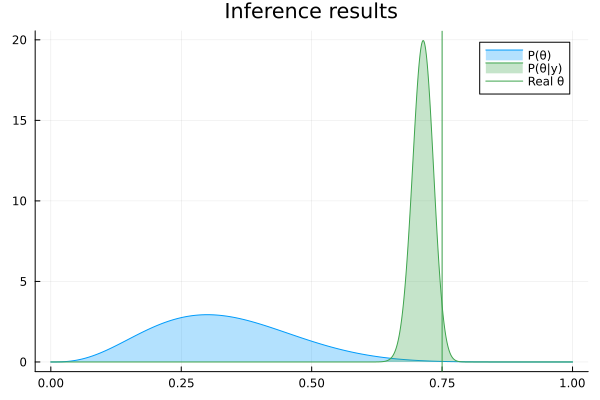

In [8]:
using Plots

rθ = range(0, 1, length = 1000)

p = plot(title = "Inference results")

plot!(rθ, (x) -> pdf(Beta(4.0, 8.0), x), fillalpha=0.3, fillrange = 0, label="P(θ)", c=1,)
plot!(rθ, (x) -> pdf(θestimated, x), fillalpha=0.3, fillrange = 0, label="P(θ|y)", c=3)
vline!([θ_real], label="Real θ")